In [22]:
# Import necessary libraries and packages

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf 
plt.style.use('fivethirtyeight')

In [23]:
# Importing Reliance data

df=yf.download('RELIANCE.NS','2012-01-01','2021-11-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,345.128540,351.542725,340.348846,349.957764,322.067078,8679938
2012-01-03,352.780975,360.037201,351.839905,358.922760,330.317627,9455771
2012-01-04,360.284851,362.043182,353.325836,354.712677,326.443054,8557084
2012-01-05,354.143066,359.071350,343.791199,346.465851,318.853516,13364666
2012-01-06,345.252350,358.600830,345.054230,355.406097,327.081207,9495456
...,...,...,...,...,...,...
2021-10-25,2680.000000,2680.000000,2570.000000,2601.800049,2593.990234,7937067
2021-10-26,2617.100098,2668.899902,2603.149902,2661.050049,2653.062500,4499706
2021-10-27,2652.000000,2676.800049,2619.949951,2627.399902,2619.513184,4567140


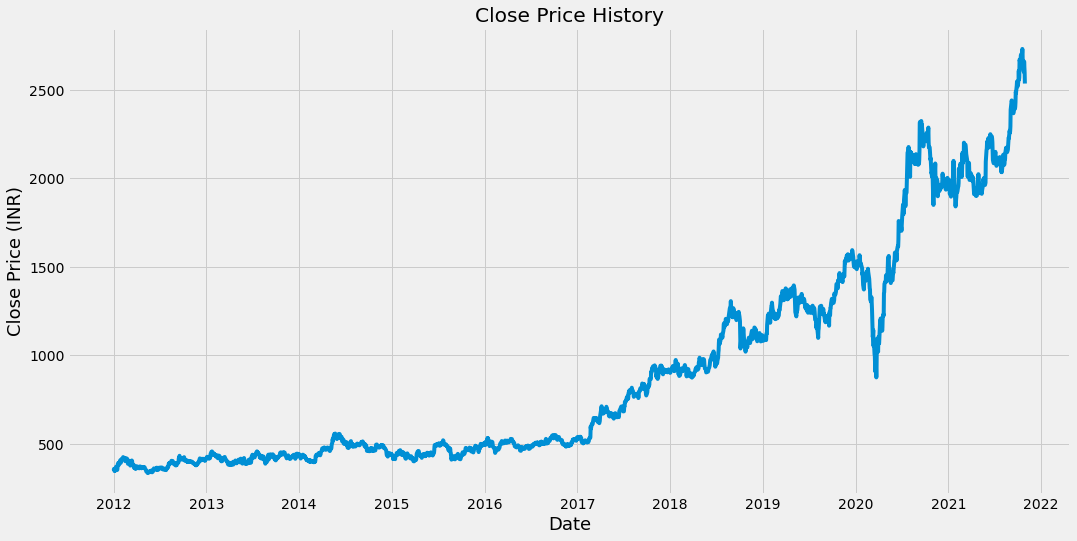

In [24]:
# Visualizing the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.show()

In [25]:
# Create a new dataframe with only a close column

data=df.filter(['Close'])

# Convert the dataframe to a numpy array

dataset=data.values

# Get the number of rows to train the model on

training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1938

In [26]:
# Scale the data

scaler=MinMaxScaler(feature_range= (0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00629212],
       [0.01003225],
       [0.00827584],
       ...,
       [0.95642415],
       [0.94440908],
       [0.91839709]])

In [27]:
#Create the training dataset
#Create the scaled training dataset

train_data=scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train datasets

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00629212, 0.01003225, 0.00827584, 0.00483532, 0.00856513,
       0.00623012, 0.01241893, 0.01490891, 0.01256357, 0.01150972,
       0.00761461, 0.01362775, 0.02141799, 0.02263716, 0.02408362,
       0.01972357, 0.02224453, 0.02373234, 0.02981781, 0.02451755,
       0.0291359 , 0.03204949, 0.03164654, 0.03351662, 0.03242145,
       0.03480811, 0.03767003, 0.03672983, 0.03453948, 0.03577931,
       0.03570698, 0.03317567, 0.02817504, 0.0293632 , 0.03460147,
       0.0325041 , 0.03378526, 0.02972482, 0.02176927, 0.02487917,
       0.02989013, 0.02786509, 0.028516  , 0.02508581, 0.02075675,
       0.01770885, 0.02018849, 0.02530278, 0.02972482, 0.02859865,
       0.02491016, 0.01988888, 0.01632438, 0.01745055, 0.01900033,
       0.01244992, 0.01404102, 0.01115844, 0.01135474, 0.01024923])]
[0.010032254891035236]



In [28]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train=np.array(x_train), np.array(y_train)

In [29]:
#Reshape the data

x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1878, 60, 1)

In [30]:
# Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1878/1878 [==============================] - 68s 33ms/step - loss: 4.8315e-04


In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1878 to 1938

test_data=scaled_data[training_data_len-60:,:]

# Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [34]:
# Convert the data to numpy array

x_test=np.array(x_test)

In [35]:
# Reshape the data

x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [36]:
# Got the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 25ms/step


In [37]:
# Got the mean squared error (RMSE)

rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

84.25286625633555

C:\Users\SAM\AppData\Local\Temp\ipykernel_8616\2524677947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


<function matplotlib.pyplot.show(close=None, block=None)>

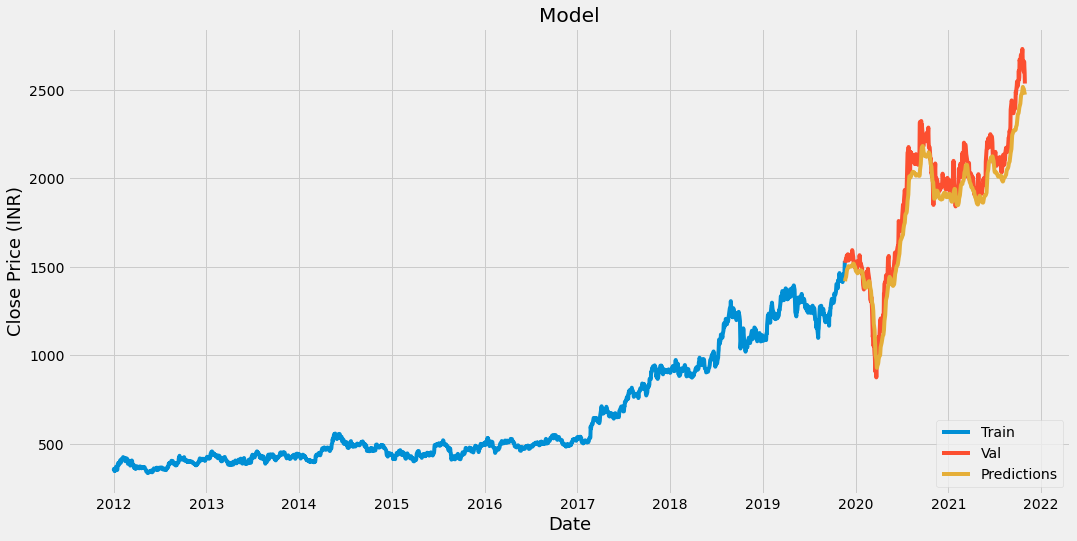

In [38]:
# Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show

In [39]:
# Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2019-11-21,1523.161987,1418.823853
2019-11-22,1531.978394,1431.875366
2019-11-25,1546.887085,1444.575317
2019-11-26,1545.599243,1457.320679
2019-11-27,1555.109131,1468.390625
...,...,...
2021-10-25,2601.800049,2504.471436
2021-10-26,2661.050049,2492.420654
2021-10-27,2627.399902,2487.248779
